# Customer Churn Prediction Project

## Business Objective

The goal of this project is to build a machine learning model that predicts the probability of customer churn for a given company. Accurately predicting churn enables the business to take proactive measures (such as customer retention campaigns) to reduce churn rates and improve revenue stability.

I will:
- Perform exploratory data analysis (EDA) to understand churn patterns.
- Train a classification model (Logistic Regression) on labeled customer data.
- Evaluate the model using appropriate metrics (accuracy, precision, recall, ROC-AUC).
- Segment customers based on predicted churn probability for business decision-making.
- Provide model explainability using SHAP to help business users understand key drivers of churn.


In [1]:
import sys
!{sys.executable} -m pip install shap


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ankit\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Shape of the dataset
print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (7043, 21)


In [4]:
# Column names
print("\nColumns in the dataset:\n", df.columns.tolist())


Columns in the dataset:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
# Data Types
print("\nData types of each column:\n", df.dtypes)


Data types of each column:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# First 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Check for missing (null) values
print("Missing values in each column:\n")
print(df.isnull().sum())

# Check how many unique values are in each column
print(df.nunique())

# Analyze the target column 'Churn'
print('\nChurn value counts:\n')
print(df['Churn'].value_counts())

# Percentage of each class in 'Churn'
print("\nChurn class distribution (%):\n")
print(df['Churn'].value_counts(normalize=True) * 100)

Missing values in each column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges      

## Cleaning the 'TotalCharges' Column

Although `df.isnull().sum()` showed that there are no missing values in the `TotalCharges` column, I noticed something unusual:

- The dataset has 7043 rows (`customerID`)
- But `TotalCharges` has only 6531 unique values

This suggests that some values in the `TotalCharges` column are not valid numbers. They might be empty strings or just spaces, which are not detected as missing (`NaN`) by Pandas.

To fix this, I will follow these steps:

1. Detect non-numeric values in the `TotalCharges` column
2. Convert all values in `TotalCharges` to numeric type  
   - Invalid values will be turned into `NaN`
3. Remove rows where conversion failed (i.e., where `NaN` appeared)

This will ensure that the `TotalCharges` column is clean and ready for analysis or modeling.

In [8]:
# Look at rows where 'TotalCharges' is not a number (contains spaces or text)
print("Rows with non-numerical TotalCharges:\n")
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])

# Convert the TotalCharges to numeric (turns bad values into NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN in TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Confirm the change
print('\nAfter cleaning:')
print("TotalCharges type:", df['TotalCharges'].dtype)
print("Any missing values in TotalCharges:", df['TotalCharges'].isnull().sum())
print('New shape of dataset:', df.shape)

Rows with non-numerical TotalCharges:

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service    

## Visualizing Feature Distributions and Relationships with Churn

Now, I will create visualizations to understand how features are distributed and how they relate to the target variable `Churn`. This helps identify trends, patterns, and important features for model building.

### 1. Distribution of Numerical Features

I will use histograms to visualize the distribution of `tenure`, `MonthlyCharges`, and `TotalCharges`.

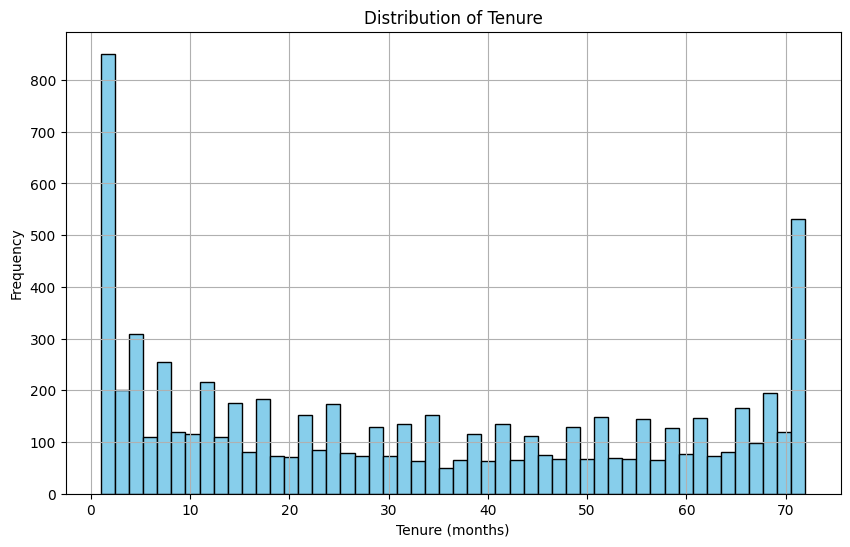

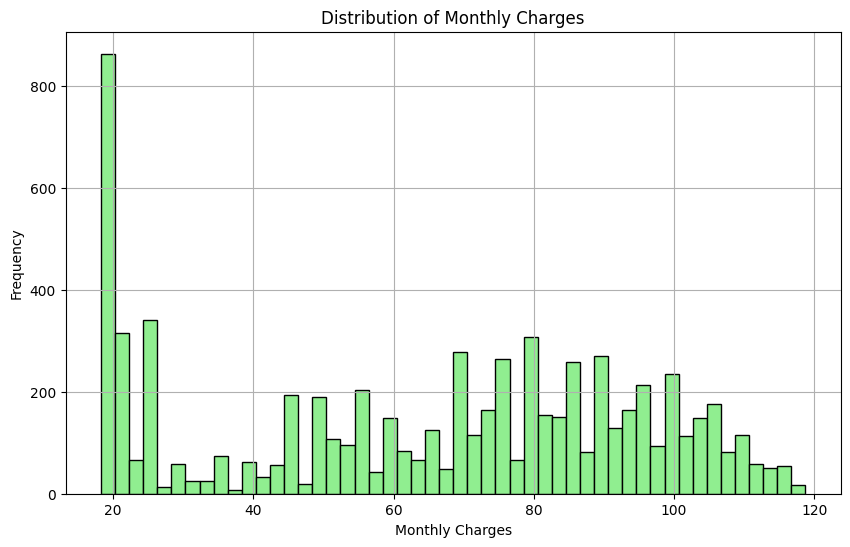

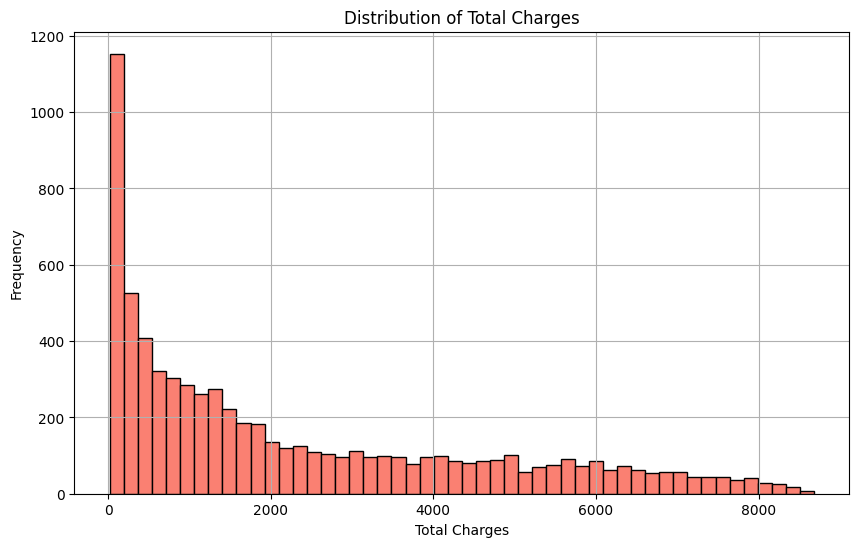

In [9]:
import matplotlib.pyplot as plt

# Plot histogram for 'tenure'
plt.figure(figsize=(10,6))
df['tenure'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'MonthlyCharges'
plt.figure(figsize=(10,6))
df['MonthlyCharges'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'TotalCharges'
plt.figure(figsize=(10,6))
df['TotalCharges'].hist(bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

New users are high in number but may churn early, while long-term customers show high loyalty. Monthly charges are spread out, but many users fall into the mid-to-high billing range. Total charges are low for most customers, indicating many are short-term users.

### 2. Box Plots – Numerical Features vs Churn

Box plots will help me compare distributions of numerical values across the `Churn` categories.

<Figure size 1000x600 with 0 Axes>

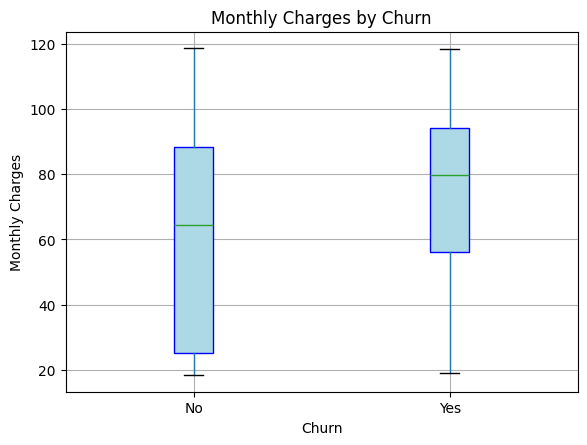

<Figure size 1000x600 with 0 Axes>

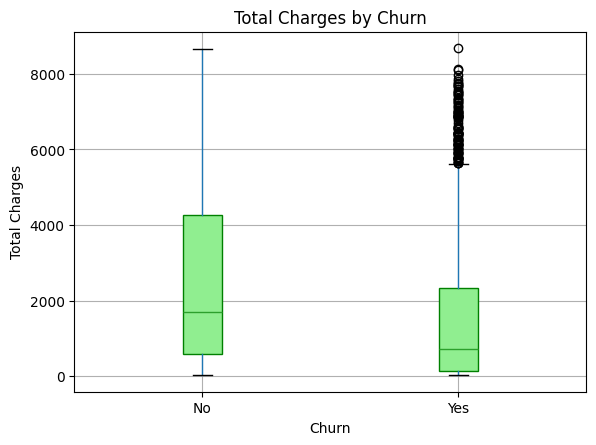

<Figure size 1000x600 with 0 Axes>

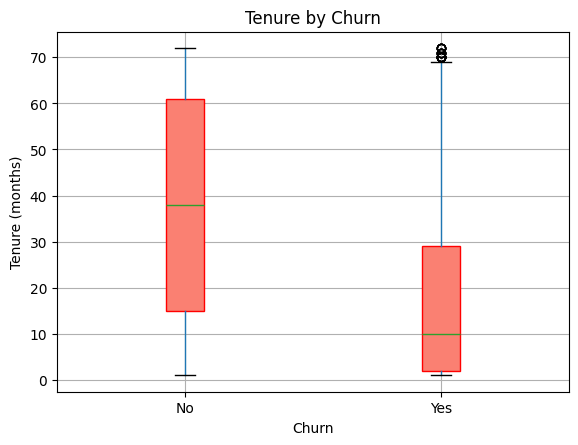

In [10]:
# Box plot for 'MonthlyCharges' vs 'Churn'
plt.figure(figsize=(10,6))
df.boxplot(column='MonthlyCharges', by='Churn', patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Monthly Charges by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Box plot for 'TotalCharges' vs 'Churn'
plt.figure(figsize=(10,6))
df.boxplot(column='TotalCharges', by='Churn', patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
plt.title('Total Charges by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# Box plot for 'tenure' vs 'Churn'
plt.figure(figsize=(10,6))
df.boxplot(column='tenure', by='Churn', patch_artist=True, boxprops=dict(facecolor='salmon', color='red'))
plt.title('Tenure by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

These graphs tell me that people who joined recently, have low total charges, or pay high monthly bills are more likely to churn.

### 3. Bar Charts – Categorical Features vs Churn

Bar charts show how categorical feature values are distributed among customers who churned and those who did not.

<Figure size 1000x600 with 0 Axes>

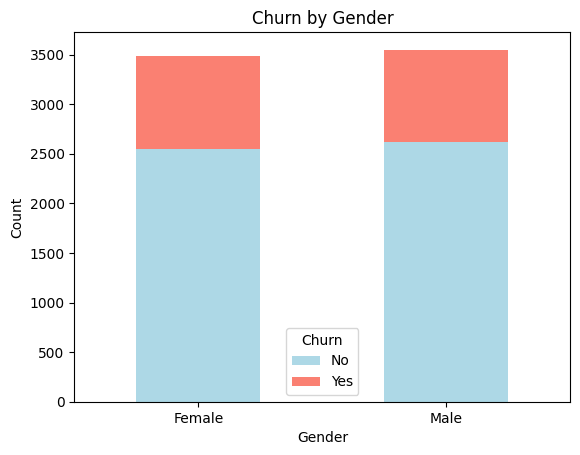

<Figure size 1000x600 with 0 Axes>

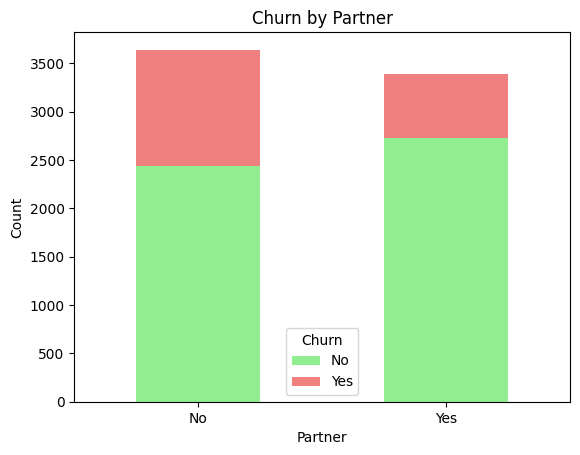

<Figure size 1000x600 with 0 Axes>

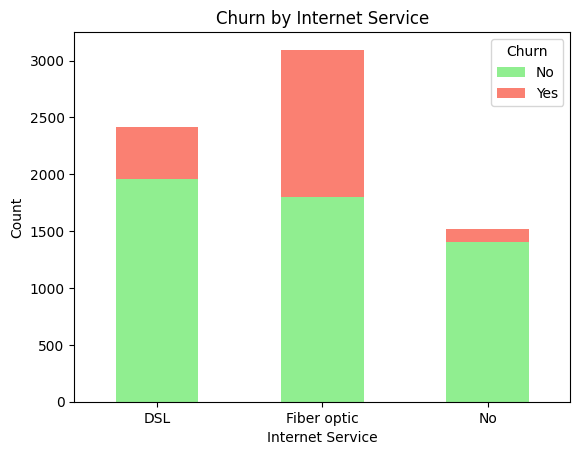

In [11]:
# Bar plot for 'gender' vs 'Churn'
plt.figure(figsize=(10,6))
df.groupby(['gender', 'Churn']).size().unstack().plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for 'Partner' vs 'Churn'
plt.figure(figsize=(10,6))
df.groupby(['Partner', 'Churn']).size().unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for 'InternetService' vs 'Churn'
plt.figure(figsize=(10,6))
df.groupby(['InternetService', 'Churn']).size().unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

• **Churn by Gender -** Churn rates are almost the same for both males and females — gender has no impact.

• **Churn by Partner -** Customers without a partner are more likely to churn than those with a partner.

• **Churn by Internet Service -** Fiber optic users have the highest churn rate compared to DSL and no internet.

In [12]:
# Show all object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols)

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [13]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Map binary categories to 0 and 1
binary_map = {'Yes': 1, 'No': 0}
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['Partner'] = df['Partner'].map(binary_map)
df['Dependents'] = df['Dependents'].map(binary_map)
df['PhoneService'] = df['PhoneService'].map(binary_map)
df['PaperlessBilling'] = df['PaperlessBilling'].map(binary_map)
df['Churn'] = df['Churn'].map(binary_map)

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
])

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# List of numeric columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

# Confirm the change
print(df[num_cols].describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean      0.442560        0.463166      0.261309
std       0.345708        0.299363      0.261571
min       0.000000        0.000000      0.000000
25%       0.112676        0.172512      0.044155
50%       0.394366        0.518408      0.159090
75%       0.760563        0.712562      0.435719
max       1.000000        1.000000      1.000000


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Step 1: Separate the features (X) and the target (y)
X = df.drop('Churn', axis=1)  # Drop only the target
y = df['Churn']  # Already mapped to 0 (No) and 1 (Yes)

# Step 2: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Print the shape to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Add these lines after the shape prints in the first split:
print("\nClass distribution:")
print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))

X_train shape: (5625, 40)
X_test shape: (1407, 40)
y_train shape: (5625,)
y_test shape: (1407,)

Class distribution:
Train: Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Test: Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


### Logistic Regression - Baseline Model

I begin with a simple and interpretable model: **Logistic Regression**.  
This model helps us establish a baseline for predicting customer churn.

#### Steps Performed:

- **Step 1**: Initialize the Logistic Regression model with `max_iter=1000`  
  This allows the model enough iterations to converge during training.

- **Step 2**: Fit the model using the training data `X_train` and `y_train`  
  This step trains the model to learn patterns from customer features.

- **Step 3**: Predict on `X_test`  
  The model tries to predict whether each customer in the test set will churn (1) or not (0).

- **Step 4**: Evaluate the performance using **accuracy score**  
  Accuracy will tell me how many predictions were correct out of all predictions made.

This baseline model gives me a reference to compare with more complex models like Decision Trees and Random Forests.

In [16]:
print("Unique values in y_train:", y_train.unique())
print("Churn distribution in y_train:")
print(y_train.value_counts())

Unique values in y_train: [0 1]
Churn distribution in y_train:
Churn
0    4130
1    1495
Name: count, dtype: int64


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Initialize the model
lr_model = LogisticRegression(max_iter=1000)

# Step 2: Fit the model to the training data
lr_model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = lr_model.predict(X_test)

# Step 4: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8045486851457001


In [18]:
# For Logistic Regression
lr_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Val Accuracy: %0.2f (+/- %0.2f)" % 
      (lr_scores.mean(), lr_scores.std() * 2))

from sklearn.model_selection import cross_validate

# Define multiple metrics to track
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'roc_auc': 'roc_auc'}

# Run cross-validation for Logistic Regression
lr_cv = cross_validate(lr_model, X, y, cv=5, scoring=scoring)

# Print results
print("\nLogistic Regression CV Results:")
print(f"Mean Accuracy: {lr_cv['test_accuracy'].mean():.2f}")
print(f"Mean Precision: {lr_cv['test_precision'].mean():.2f}")
print(f"Mean Recall: {lr_cv['test_recall'].mean():.2f}")
print(f"Mean ROC-AUC: {lr_cv['test_roc_auc'].mean():.2f}")

Logistic Regression Cross-Val Accuracy: 0.80 (+/- 0.02)

Logistic Regression CV Results:
Mean Accuracy: 0.80
Mean Precision: 0.65
Mean Recall: 0.55
Mean ROC-AUC: 0.84


### Logistic Regression Evaluation: Precision, Recall, F1-Score, and Confusion Matrix

After training the Logistic Regression model and obtaining accuracy, I now evaluate the model's ability to correctly identify churned and non-churned customers.

#### Key Metrics:
- **Precision**: Out of all customers predicted to churn, how many actually churned.
- **Recall**: Out of all customers who churned, how many did the model correctly identify.
- **F1-Score**: Harmonic mean of precision and recall. Balanced measure for imbalanced data.
- **Confusion Matrix**: Matrix showing true positives, false positives, true negatives, and false negatives.

These metrics helps me understand if the model is biased toward any class, and how well it handles the minority churn class.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Generate the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Step 2: Display confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1033
       Churn       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:

[[919 114]
 [161 213]]


### Confusion Matrix – Heatmap Visualization

After evaluating our Logistic Regression model, I visualize the confusion matrix using a heatmap for clearer insights.

- **True Positives (TP):** Model correctly predicts churn
- **True Negatives (TN):** Model correctly predicts no churn
- **False Positives (FP):** Model incorrectly predicts churn
- **False Negatives (FN):** Model incorrectly predicts no churn

This heatmap makes it easier to **see misclassifications** and share results with stakeholders.

In [20]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ankit\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


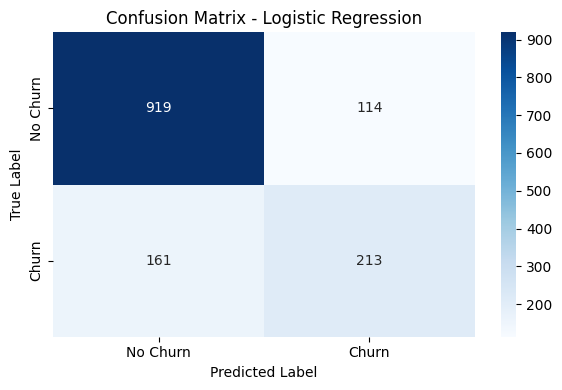

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## ROC AUC – Evaluating Model Discrimination

- **ROC AUC (Receiver Operating Characteristic - Area Under Curve)** measures how well the model distinguishes between classes across all threshold values.
- A perfect model has **AUC = 1.0**, a random model has **AUC = 0.5**.
- I will:
  - Predict **probabilities** using `predict_proba`
  - Compute the **ROC AUC score**
  - Plot the **ROC Curve** to visualize performance

ROC AUC Score: 0.834748745929772


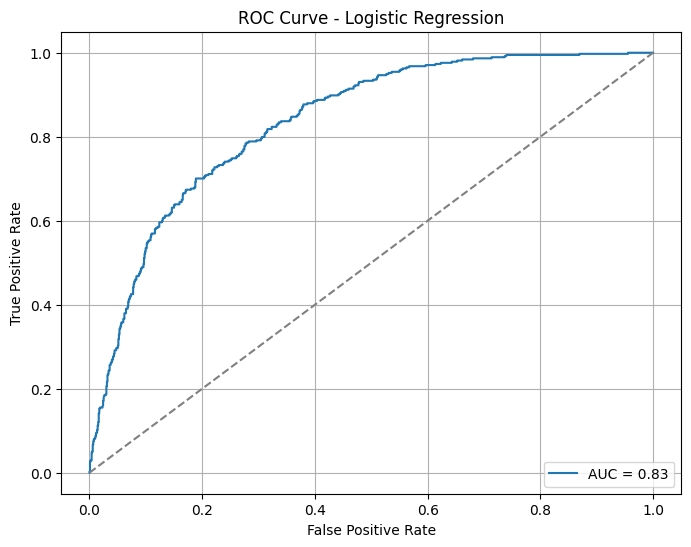

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Predict probabilities for class 1 (churn)
y_probs = lr_model.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", auc_score)

# Step 3: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Decision Tree Classifier – Training and Evaluation

This section trains and evaluates a Decision Tree Classifier on the churn dataset using the following steps:

---

**Step 1: Train the Model**  
- Initialize a `DecisionTreeClassifier` with a fixed random state for reproducibility.  
- Fit the model using the training data (`X_train`, `y_train`).

---

**Step 2: Make Predictions**  
- Predict churn outcomes (`y_pred_dt`) on the test data (`X_test`).  
- Also compute predicted probabilities (`y_probs_dt`) needed for ROC analysis.

---

**Step 3: Evaluate Performance**  
- Display a classification report with precision, recall, F1-score, and support for each class.  
- Print a confusion matrix to visualize correct and incorrect predictions.

---

**Step 4: Compute ROC AUC Score**  
- Calculate the Area Under the Receiver Operating Characteristic Curve (ROC AUC), which shows the model's ability to distinguish between the classes at various thresholds.

---

**Step 5: Plot the ROC Curve**  
- Plot the ROC curve using false positive rate and true positive rate.  
- A curve closer to the top-left corner indicates better performance.

Classification Report - Decision Tree:

              precision    recall  f1-score   support

    No Churn       0.82      0.81      0.82      1033
       Churn       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407

Confusion Matrix - Decision Tree:

[[839 194]
 [184 190]]
ROC AUC Score - Decision Tree: 0.6596331747519038


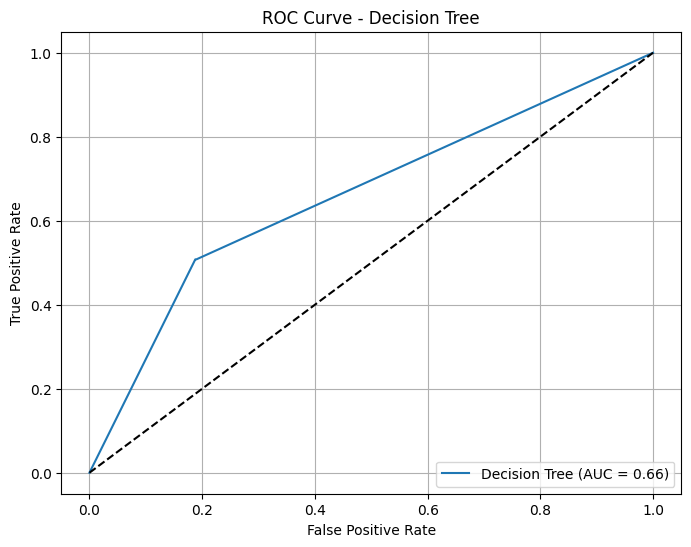

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Initialize and Train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 2: Predict on Test Data
y_pred_dt = dt_model.predict(X_test)
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# Step 3: Evaluate Performance
print("Classification Report - Decision Tree:\n")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))
print("Confusion Matrix - Decision Tree:\n")
print(confusion_matrix(y_test, y_pred_dt))

# Step 4: Compute ROC AUC
auc_dt = roc_auc_score(y_test, y_probs_dt)
print("ROC AUC Score - Decision Tree:", auc_dt)

# Step 5: Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Training and Evaluating a Random Forest Classifier

In this step, I will train a **Random Forest Classifier** to predict customer churn.

Random Forest is an **ensemble learning algorithm** that builds multiple decision trees and combines their predictions to improve performance and reduce overfitting.

#### What I will do:

- **Step 1:** Initialize the `RandomForestClassifier` with 100 trees.
- **Step 2:** Train the model on the training data (`X_train`, `y_train`).
- **Step 3:** Make predictions on the test data (`X_test`).
- **Step 4:** Evaluate performance using:
  - `classification_report` for precision, recall, F1-score.
  - `confusion_matrix` to observe prediction breakdown.
  - `roc_auc_score` to measure how well the model distinguishes between classes.
- **Step 5:** Plot the ROC Curve to visualize performance across different thresholds.

Classification Report - Random Forest:

              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix - Random Forest:

[[921 112]
 [189 185]]
ROC AUC Score - Random Forest: 0.812717747487977


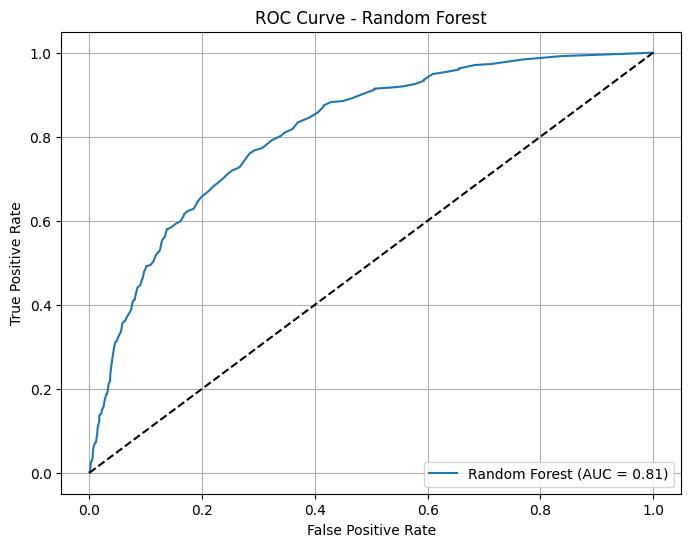

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Initialize and Train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predict on Test Data
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Step 3: Evaluate Performance
print("Classification Report - Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))
print("Confusion Matrix - Random Forest:\n")
print(confusion_matrix(y_test, y_pred_rf))

# Step 4: Compute ROC AUC
auc_rf = roc_auc_score(y_test, y_probs_rf)
print("ROC AUC Score - Random Forest:", auc_rf)

# Step 5: Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [25]:
# For Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-Val Accuracy: %0.2f (+/- %0.2f)" % 
      (rf_scores.mean(), rf_scores.std() * 2))

Random Forest Cross-Val Accuracy: 0.79 (+/- 0.03)


## Tuning the Classification Threshold – Logistic Regression

By default, most classifiers use a **0.5 threshold** to decide between classes. However, in churn prediction, **missing actual churners (false negatives)** is often more costly than flagging non-churners as churners (false positives).

To improve recall, I will:

1. Use `predict_proba()` to get churn probabilities.
2. Set a **custom threshold** (e.g., 0.3 instead of 0.5).
3. Convert probabilities to class labels based on that threshold.
4. Evaluate precision, recall, F1-score, and plot confusion matrix.

This helps me explore the **trade-off between precision and recall**.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Predict churn probabilities using Logistic Regression
y_probs_lr = lr_model.predict_proba(X_test)[:, 1]

# Step 2: Define custom threshold
threshold = 0.3  # Lower than 0.5 to catch more churners

# Step 3: Convert probabilities to predicted labels based on threshold
y_pred_thresh = (y_probs_lr >= threshold).astype(int)

# Step 4: Evaluate performance
print(f"Classification Report (Threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_thresh, target_names=['No Churn', 'Churn']))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_thresh))

Classification Report (Threshold = 0.3):

              precision    recall  f1-score   support

    No Churn       0.89      0.74      0.81      1033
       Churn       0.51      0.75      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.76      1407

Confusion Matrix:

[[763 270]
 [ 92 282]]


## Implementing XGBoost for Enhanced Churn Prediction

While I have achieved decent results with Logistic Regression and Random Forest, we can potentially improve our predictions using **XGBoost (Extreme Gradient Boosting)**. Here's why we're adding this:

### Why XGBoost?
- **Proven Performance**: Consistently wins machine learning competitions
- **Efficiency**: Handles large datasets faster than traditional methods
- **Built for Imbalance**: Better with our 73%/27% class distribution
- **Feature Importance**: Provides clear insights into what drives churn

### What Makes XGBoost Special?
1. **Gradient Boosting**: Builds trees sequentially, correcting previous errors
2. **Regularization**: Built-in controls to prevent overfitting
3. **Handles Missing Values**: Automatically deals with NA entries
4. **Parallel Processing**: Uses your computer's full power

### Implementation Approach:
1. Basic XGBoost model as a new baseline
2. Feature importance visualization

I will compare its results directly with our existing models to see if it provides meaningful improvement for our business case.

In [27]:
!pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    random_state=42,
    eval_metric='logloss'  # evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]  # probabilities for churn

# Evaluate
print("Classification Report - XGBoost:\n")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn', 'Churn']))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs_xgb))

Classification Report - XGBoost:

              precision    recall  f1-score   support

    No Churn       0.83      0.86      0.84      1033
       Churn       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

ROC AUC Score: 0.8139511106739623


<Figure size 1000x800 with 0 Axes>

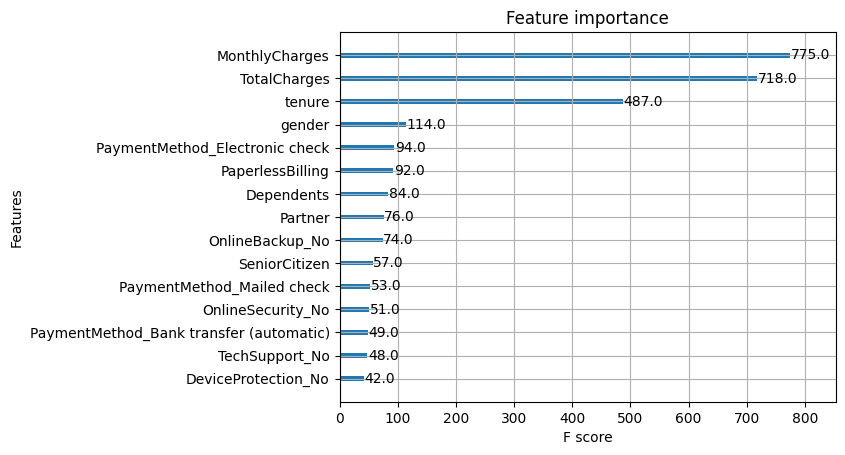

In [29]:
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=15)
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Define parameters to test
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Search for best parameters
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


## Model Comparison Summary

In this step, I compare all trained models side-by-side using key evaluation metrics:

- **Accuracy**: Overall correctness of predictions.
- **Precision (Churn)**: Out of predicted churners, how many were actual churners.
- **Recall (Churn)**: Out of actual churners, how many were correctly predicted.
- **F1-score (Churn)**: Harmonic mean of precision and recall.
- **ROC AUC**: Measures how well the model distinguishes churners from non-churners across thresholds.

### Models being compared:
- Logistic Regression (default threshold = 0.5)
- Decision Tree
- Random Forest
- Logistic Regression with threshold tuned to 0.3

This comparison will help me understand which model performs best overall and for business goals like minimizing false negatives (missed churners).

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Store all metrics in a dictionary
comparison = {
    "Model": [],
    "Accuracy": [],
    "Precision (Churn)": [],
    "Recall (Churn)": [],
    "F1-score (Churn)": [],
    "ROC AUC": []
}

# Helper function to compute metrics
def evaluate_model(name, y_true, y_pred, y_probs=None):
    comparison["Model"].append(name)
    comparison["Accuracy"].append(accuracy_score(y_true, y_pred))
    comparison["Precision (Churn)"].append(precision_score(y_true, y_pred))
    comparison["Recall (Churn)"].append(recall_score(y_true, y_pred))
    comparison["F1-score (Churn)"].append(f1_score(y_true, y_pred))
    comparison["ROC AUC"].append(roc_auc_score(y_true, y_probs) if y_probs is not None else None)

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_pred, y_probs)
evaluate_model("Decision Tree", y_test, y_pred_dt, y_probs_dt)
evaluate_model("Random Forest", y_test, y_pred_rf, y_probs_rf)
evaluate_model("LogReg (Thresh=0.3)", y_test, y_pred_thresh, y_probs)
evaluate_model("XGBoost", y_test, y_pred_xgb, y_probs_xgb)

# Create and format DataFrame
df_comparison = pd.DataFrame(comparison)
df_comparison = df_comparison.round(3)  # Round all values to 3 decimal places

# Display formatted table
print("Model Comparison:\n")
print(df_comparison.to_string(index=False))  # Clean output without index

Model Comparison:

              Model  Accuracy  Precision (Churn)  Recall (Churn)  F1-score (Churn)  ROC AUC
Logistic Regression     0.805              0.651           0.570             0.608    0.835
      Decision Tree     0.731              0.495           0.508             0.501    0.660
      Random Forest     0.786              0.623           0.495             0.551    0.813
LogReg (Thresh=0.3)     0.743              0.511           0.754             0.609    0.835
            XGBoost     0.768              0.571           0.516             0.542    0.814


In [32]:
from sklearn.model_selection import StratifiedKFold

# Create stratified folds
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run CV
strat_scores = cross_val_score(lr_model, X, y, cv=strat_kfold, scoring='recall')
print("\nStratified CV Recall Scores:", strat_scores)
print("Mean Recall:", strat_scores.mean())


Stratified CV Recall Scores: [0.55347594 0.55080214 0.54423592 0.53475936 0.55347594]
Mean Recall: 0.5473498587833866


C:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


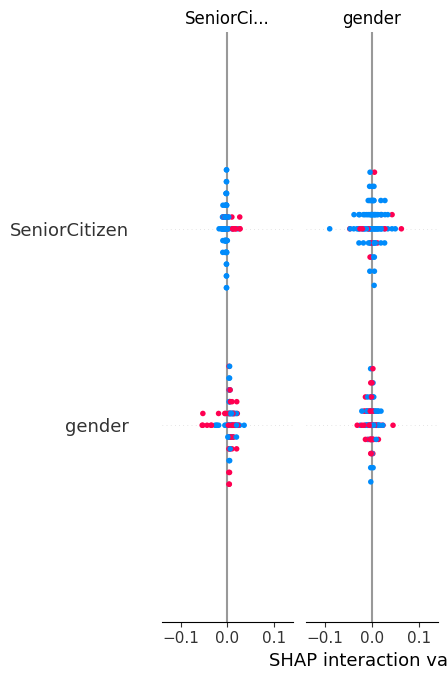

In [33]:
# -----------------------------
# Model Interpretability (SHAP)
# -----------------------------
import shap

# Use a smaller test sample for better performance
X_sample = X_test.sample(100, random_state=42)

# Use the best-performing model – here: Random Forest
explainer = shap.Explainer(rf_model)

# Compute SHAP values
shap_values = explainer(X_sample)

# Show SHAP summary plot
shap.summary_plot(shap_values, X_sample)

## Churn Risk Segmentation

To translate model outputs into actionable business insights, I segment customers based on their predicted churn probabilities using the Logistic Regression model.

Instead of applying a fixed threshold (e.g., 0.5), I assign customers to different risk levels:

- **High Risk** (probability ≥ 0.7): These customers are most likely to churn. Target with high-touch interventions (e.g., phone calls, special offers).
- **Medium Risk** (0.4 ≤ probability < 0.7): Customers with moderate churn probability. Target with moderate-cost actions (e.g., personalized emails).
- **Low Risk** (probability < 0.4): Least likely to churn. Maintain engagement via low-cost actions (e.g., newsletters or surveys).

This segmentation approach is often used in professional settings like telecom, SaaS, and finance to **prioritize retention strategies** based on customer value and churn risk.

In [34]:
import numpy as np
import pandas as pd

# Step 1: Predict probabilities for churn (class 1)
y_probs_lr = lr_model.predict_proba(X_test)[:, 1]

# Step 2: Create a DataFrame to store results
risk_df = pd.DataFrame({
    'Churn_Probability': y_probs_lr,
    'Actual_Churn': y_test.values  # Ensure y_test is a Series, not DataFrame
})

# Step 3: Define segmentation logic
def risk_segment(prob):
    if prob >= 0.7:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Step 4: Apply segmentation
risk_df['Risk_Segment'] = risk_df['Churn_Probability'].apply(risk_segment)

# Step 5: Show segmentation summary
print("Churn Risk Segment Distribution:\n")
print(risk_df['Risk_Segment'].value_counts())

# Optional: Show risk-wise churn rate
print("\nChurn Rate within Each Segment:\n")
print(risk_df.groupby('Risk_Segment')['Actual_Churn'].mean().sort_values(ascending=False).round(2))

Churn Risk Segment Distribution:

Risk_Segment
Low Risk       967
Medium Risk    362
High Risk       78
Name: count, dtype: int64

Churn Rate within Each Segment:

Risk_Segment
High Risk      0.74
Medium Risk    0.54
Low Risk       0.13
Name: Actual_Churn, dtype: float64


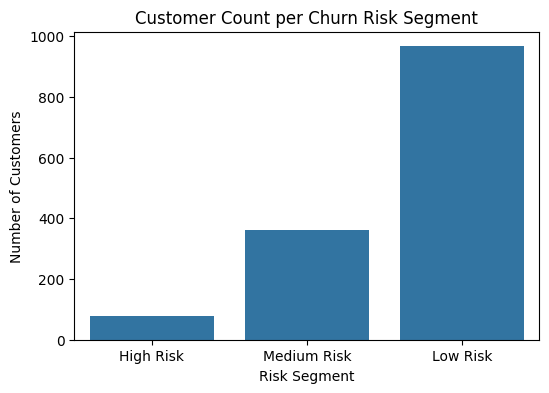

In [35]:
import matplotlib.pyplot as plt

# Plot risk segment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=risk_df, x='Risk_Segment', order=['High Risk', 'Medium Risk', 'Low Risk'])
plt.title("Customer Count per Churn Risk Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Risk Segment")
plt.show()

# Model Performance Analysis

## Performance Metrics Comparison

| Model                  | Accuracy | Precision (Churn) | Recall (Churn) | F1-Score (Churn) | ROC-AUC |
|------------------------|----------|-------------------|----------------|------------------|---------|
| **Logistic Regression** | 80.5%    | 65.1%             | 57.0%          | 60.8%            | 0.835   |
| **Random Forest**       | 78.6%    | 62.3%             | 49.5%          | 55.1%            | 0.813   |
| **XGBoost**            | 76.8%    | 57.1%             | 51.6%          | 54.2%            | 0.814   |
| **Decision Tree**      | 73.1%    | 49.5%             | 50.8%          | 50.1%            | 0.660   |

## Key Observations

### 1. Accuracy
- LR has the highest accuracy (80.5%), but this metric can be misleading due to class imbalance (73% "No Churn").
- Accuracy alone favors the majority class and doesn't reflect performance on churn prediction.

### 2. Recall (Sensitivity)
- Baseline LR recall: 57%
- Threshold-tuned LR (0.3) recall: 75.4%
- XGBoost recall: 51.6%
- Random Forest recall: 49.5%

**Why recall matters:** Measures ability to identify actual churners. Low recall means missing potential churners, which is costly for business.

### 3. Precision
- LR precision: 65.1% (best among models)
- High precision means fewer false positives (non-churners incorrectly flagged as churners).

### 4. ROC-AUC
- LR: 0.835
- Random Forest: 0.813
- Measures overall class separation capability, crucial for imbalanced data.

### 5. Threshold Tuning
- Lowering decision threshold to 0.3 for LR:
  - Boosted recall to 75.4%
  - Reduced precision
  - Common practical trade-off in churn prediction

## Does Logistic Regression Actually Perform Better?

### When LR is Better:
- **Interpretability & Stability**:
  - Simpler model, less prone to overfitting
  - Provides coefficients for business insights (e.g., "Fiber optic users churn more")
- **Raw Metrics**:
  - Wins on accuracy, precision, and AUC
  - Best choice when you need model explainability

### When Other Models Might Be Better:
- **If recall is top priority**:
  - Threshold-tuned LR (75.4% recall) outperforms all
  - But Random Forest/XGBoost might achieve reasonable recall without tuning
- **With larger datasets**:
  - Tree-based models often improve with more data

## Why LR Outperformed Complex Models

1. **Dataset Size**:
   - 7,032 samples may be sufficient for LR's linear assumptions
   - Tree-based models often need more data to show their advantage

2. **Feature Engineering**:
   - One-hot encoding and scaling benefit LR
   - Tree-based models don't require scaling but adapted well

3. **Overfitting**:
   - Decision Tree clearly overfit (AUC: 0.66)
   - Random Forest and XGBoost showed better generalization but still trailed LR

## Recommendations

**For Deployment**:
   - Use **threshold-tuned LR (0.3)** if catching churners is critical (high recall)
   - Use **vanilla LR** if you value precision and interpretability